<a href="https://colab.research.google.com/github/snehabn/thinkful_capstone2/blob/main/Capstone_II_SN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adult Income Case Study

Sneha Narasimhan

Thinkful Capstone 2

## Introduction

Income information is a key data point gathered in the annual census. The government started to gather this data in the 1940s as a way to the gauge economic state of the country during the Great Depression [1]. Currently this data is additionally used for allocation of funds in sectors such as "food, health care, job training, housing, and other assistance" [1]. Factors affecting income can be education, gender, race, occupation, age, etc... In this case study we look at some of these factors and how they impact wage levels.

The [Census Income Dataset](https://archive.ics.uci.edu/dataset/2/adult) from UCI ML Repository was used for this analysis. The data is from 1994 and was originally extracted by Barry Becker.

------------------------

## Data Setup

In [ ]:
# Set up environment

import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import pprint
import seaborn as sns
import math
%matplotlib inline

In [ ]:
# Import data from UCI Machine Learning's repository

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=0)
# test_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', header=0)

# Set column names per documentation
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
            'relationship', 'race', 'sex', 'capital_gains', 'capital_loss', 'hours_per_week', 'native_country',
            'wage_class']
data.columns = col_names
#test_data.columns = col_names


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gains   32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  wage_class      32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


On initial perusal we see that there are 15 features available in this dataset, with 32,560 entries.

<mark>age</mark>  <mark>workclass</mark>  <mark>fnlwgt</mark>

<mark>education</mark>  <mark>education_num</mark>  <mark>marital_status</mark>

<mark>occupation</mark>  <mark>relationship</mark>  <mark>race</mark>

<mark>sex</mark>  <mark>capital_gains</mark>  <mark>capital_loss</mark>

<mark>hours_per_week</mark>  <mark>native_country</mark>  <mark>wage_class</mark>


In [ ]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gains,capital_loss,hours_per_week,native_country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
# Determine statistics of numerical columns
data.describe()

,age,fnlwgt,education_num,capital_gains,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Checking for nulls in DataFrame
print('Nulls in df: ', data.isnull().values.any())
print('Sum of nulls: ', data.isnull().sum())

Nulls in df:  False
Sum of nulls:  age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gains     0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64


There appear to be no null values in the dataset.

------------------------

## Feature Engineering

### Data preview

We will start the feature engineering section by understanding further the contents of the dataset. Here we examine the unique values present in each column.

In [ ]:
# Preview of unique values.
unique_vals = {}
unique_vals['age'] = data.age.unique().tolist()
unique_vals['workclass'] = data.workclass.unique().tolist()
unique_vals['education'] = data.education.unique().tolist()
unique_vals['education_num'] = data.education_num.unique().tolist()
unique_vals['marital_status'] = data.marital_status.unique().tolist()
unique_vals['occupation'] = data.occupation.unique().tolist()
unique_vals['relationship'] = data.relationship.unique().tolist()
unique_vals['race'] = data.race.unique().tolist()
unique_vals['sex'] = data.sex.unique().tolist()
unique_vals['hours_per_week'] = data.hours_per_week.unique().tolist()
unique_vals['native_country'] = data.native_country.unique().tolist()
unique_vals['capital_gains'] = data.capital_gains.unique().tolist()
unique_vals['capital_loss'] = data.capital_loss.unique().tolist()
unique_vals['wage_class'] = data.wage_class.unique().tolist()

pprint.pprint(unique_vals,  indent=1, width=100, compact=True)

{'age': [50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54, 35, 59, 56, 19, 39, 20,
         45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47, 46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64,
         71, 68, 66, 51, 58, 26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82, 83,
         84, 85, 86, 87],
 'capital_gains': [0, 14084, 5178, 5013, 2407, 14344, 15024, 7688, 34095, 4064, 4386, 7298, 1409,
                   3674, 1055, 3464, 2050, 2176, 2174, 594, 20051, 6849, 4101, 1111, 8614, 3411,
                   2597, 25236, 4650, 9386, 2463, 3103, 10605, 2964, 3325, 2580, 3471, 4865, 99999,
                   6514, 1471, 2329, 2105, 2885, 25124, 10520, 2202, 2961, 27828, 6767, 2228, 1506,
                   13550, 2635, 5556, 4787, 3781, 3137, 3818, 3942, 914, 401, 2829, 2977, 4934,
                   2062, 2354, 5455, 15020, 1424, 3273, 22040, 4416, 3908, 10566, 991, 4931, 1086,
                   7430, 6497, 114, 7896, 2346, 3418, 3432, 2907, 1151, 2414, 229

In [ ]:
# Number of unique values in each feature
for key, value in unique_vals.items():
    print(key,':', len([item for item in value if item]))

age : 73
workclass : 9
education : 16
education_num : 16
marital_status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
hours_per_week : 94
native_country : 42
capital_gains : 118
capital_loss : 91
wage_class : 2


We found here that there are three columns, `native_country`, `occupation`, `workclass`,  where there is a value of `' ?'` present. We check here the number of entries that have this value.

In [ ]:
print(data.loc[data['native_country'] == ' ?'].shape)
print(data.loc[data['occupation'] == ' ?'].shape)
print(data.loc[data['workclass'] == ' ?'].shape)

(583, 15)
(1843, 15)
(1836, 15)


There are a substantial number of entries with this value present. It would not be reccomended to drop these entries as there is other valuable information present in these entries. We will attempt to decrease these numbers by dropping any duplicates in the dataset.

In [ ]:
# Drop duplicate values
data = data.drop_duplicates()

In [ ]:
print(data.loc[data['native_country'] == ' ?'].shape)
print(data.loc[data['occupation'] == ' ?'].shape)
print(data.loc[data['workclass'] == ' ?'].shape)

(582, 15)
(1843, 15)
(1836, 15)


Next we are going to make an assumption that the entries with `' ?'` had undisclosed information. We will replace this value with `Undisclosed` for now.

In [ ]:
# Replace ' ?' entries with 'Undisclosed'
data['native_country'] = data['native_country'].replace(' ?', 'Undisclosed')
data['occupation'] = data['occupation'].replace(' ?', 'Undisclosed')
data['workclass'] = data['workclass'].replace(' ?', 'Undisclosed')

In [ ]:
print(data.loc[data['native_country'] == ' ?'].shape)
print(data.loc[data['occupation'] == ' ?'].shape)
print(data.loc[data['workclass'] == ' ?'].shape)

(0, 15)
(0, 15)
(0, 15)


We will begin the feature selection process first with a preview of the breakdown of a possible target variable, `wage_class` .

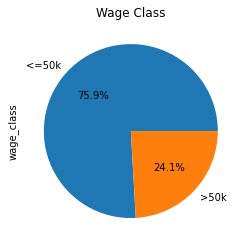

In [ ]:
# Examine breakdown of wage_class

# Count the occurrences of True and False
value_counts = data['wage_class'].value_counts()

# Create a pie chart
value_counts.plot(kind='pie', autopct='%1.1f%%', labels=['<=50k', '>50k'])

# Add a title to the plot
plt.title('Wage Class')

# Show the plot
plt.show()


Here we see that the majority of the people in this sample make less than \\$50,000 per year. According to the Census Bureau, the median income per household at the time was \\$32,264[2]. This information is confirmed with the preliminary data seen in this dataset. We will continue this preliminary exploration by observing the demographic in this wage gap split.

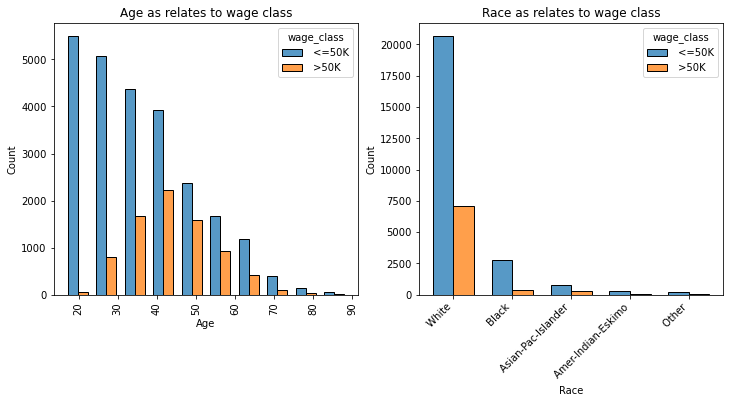

In [ ]:
# What is the demographic in the wage gap split?

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot=sns.histplot(data = data, x="age", hue="wage_class", multiple="dodge", bins = 10, shrink=.7)
plot.set_title('Age as relates to wage class')
plot.set_xlabel('Age')
plt.xticks(rotation=90, ha='center')
#plt.show()


plt.subplot(1, 2, 2)
plot=sns.histplot(data = data, x = "race", hue="wage_class", multiple="dodge", shrink=.7)
plot.set_title('Race as relates to wage class')
plot.set_xlabel('Race')

plt.xticks(rotation=45, ha='right')
plt.show()



The `age` feature shows that people tend to have lower wage jobs in their younger years and an increased wage during the peak of their careers. Generally with more experience comes a more lucrative position and the gap between the `<=50k` and `>50k` groups seem to get smaller.

The `race` features shows that the majority people in this dataset for both levels of wage classes identify as 'White'.

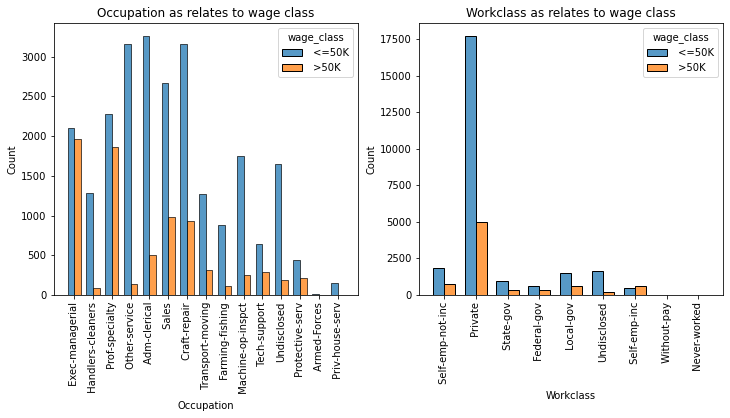

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

plot=sns.histplot(data = data, x="occupation", hue="wage_class", multiple="dodge", shrink=.7)
plot.set_title('Occupation as relates to wage class')
plot.set_xlabel('Occupation')
plt.xticks(rotation=90, ha='center')
#plt.show()

plt.subplot(1, 2, 2)
plot=sns.histplot(data = data, x="workclass", hue="wage_class", multiple="dodge", shrink=.7)
plot.set_title('Workclass as relates to wage class')
plot.set_xlabel('Workclass')
plt.xticks(rotation=90, ha='center')
plt.show()

We can see from these two graphs that the two top professions with the least difference in wage class are `'Exec-managerial'` and `'Prof-specialty'` and the workclass that accounts for most entries is `'Private'`.

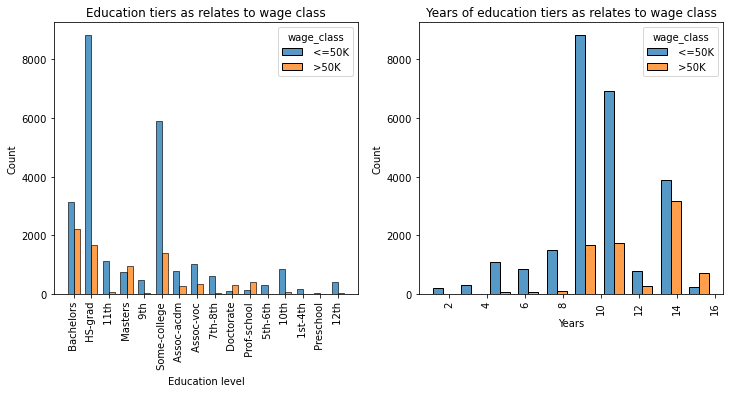

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot=sns.histplot(data = data, x="education", hue="wage_class", multiple="dodge", bins = 10, shrink=.7)
plot.set_title('Education tiers as relates to wage class')
plot.set_xlabel('Education level')

plt.xticks(rotation=90, ha='center')
#plt.show()

plt.subplot(1, 2, 2)
plot=sns.histplot(data = data, x="education_num", hue="wage_class", multiple="dodge", bins = 10, shrink=.7)
plot.set_title('Years of education tiers as relates to wage class')
plot.set_xlabel('Years')
plt.xticks(rotation=90, ha='center')
plt.show()

These graphs have a clear indication that the more education a person has the higher possibility of them having a higher wage job. The "college wage premium" is a clearly represented here, where the higher the education level and  skills people have the higher the wage [3].

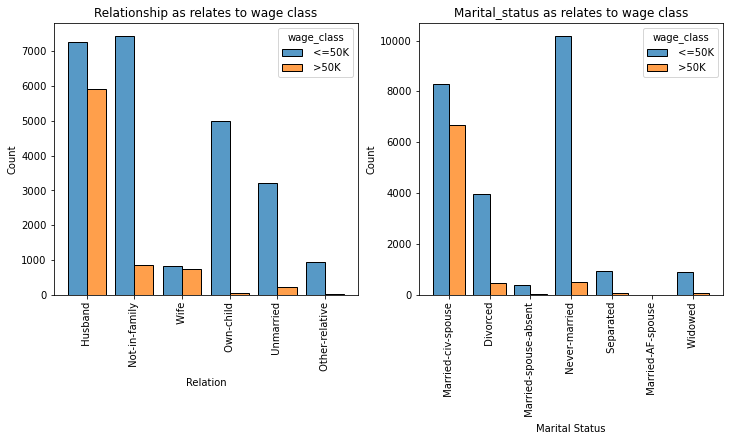

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot=sns.histplot(data = data, x="relationship", hue="wage_class", multiple="dodge", bins = 10, shrink=.8)
plot.set_title('Relationship as relates to wage class')
plot.set_xlabel('Relation')

plt.xticks(rotation=90, ha='center')
#plt.show()

plt.subplot(1, 2, 2)
plot=sns.histplot(data = data, x="marital_status", hue="wage_class", multiple="dodge", bins = 10, shrink=.8)
plot.set_title('Marital_status as relates to wage class')
plot.set_xlabel('Marital Status')

plt.xticks(rotation=90, ha='center')
plt.show()

The majority of people who are higher wage earners appear to be married husbands. Those who were never married hold the top spot for earning less than 50k.

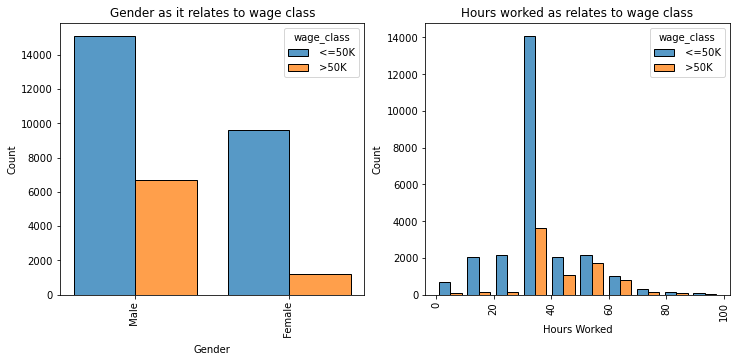

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot=sns.histplot(data = data, x="sex", hue="wage_class", multiple="dodge", bins = 10, shrink=.8)
plot.set_title('Gender as it relates to wage class')
plot.set_xlabel('Gender')

plt.xticks(rotation=90, ha='center')
#plt.show()

plt.subplot(1, 2, 2)
plot=sns.histplot(data = data, x="hours_per_week", hue="wage_class", multiple="dodge", bins = 10, shrink=.8)
plot.set_title('Hours worked as relates to wage class')
plot.set_xlabel('Hours Worked')

plt.xticks(rotation=90, ha='center')
plt.show()

In general there are more men than women in this data and the majority of people are of the lower wage class. There are more men than women who are in the high wage class. Additionally the majority of the lower wage class group works a forty hour work week while there is a greater distribution of folks working 40 hours or more in the upper wage class.

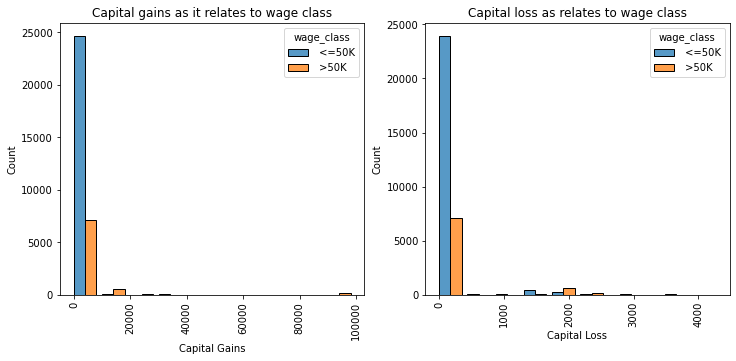

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot=sns.histplot(data = data, x="capital_gains", hue="wage_class", multiple="dodge", bins = 10, shrink=.8)
plot.set_title('Capital gains as it relates to wage class')
plot.set_xlabel('Capital Gains')

plt.xticks(rotation=90, ha='center')
#plt.show()

plt.subplot(1, 2, 2)
plot=sns.histplot(data = data, x="capital_loss", hue="wage_class", multiple="dodge", bins = 10, shrink=.8)
plot.set_title('Capital loss as relates to wage class')
plot.set_xlabel('Capital Loss')

plt.xticks(rotation=90, ha='center')
plt.show()

According to Cornell Law School, "capital gains refers to profits gained from the sale of capital assets" [4]. The majority of people in this dataset did not have capital gains or losses.

Overall the features that seem to be most interesting to retain with respect to `wage_class` are `age`, `education`, `marital_status`, `sex`, and `hours_worked`.

Let's examine another possible target variable, `sex`.

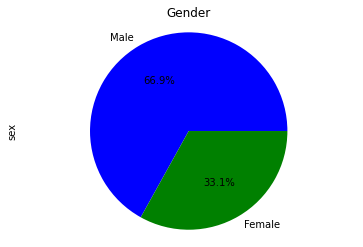

In [ ]:
# Examine breakdown of sex

# Count the occurrences of True and False
value_counts = data['sex'].value_counts()

# Create a pie chart
colors = ['blue', 'green']
value_counts.plot(kind='pie', colors=colors, autopct='%1.1f%%', labels=['Male', 'Female'])

# Add a title to the plot
plt.title('Gender')

# Show the plot
plt.axis('equal')
plt.show()


Approximately two-thirds of people in this dataset identify as male. Next, we plot the relationship that gender has with each of the previously shown features.

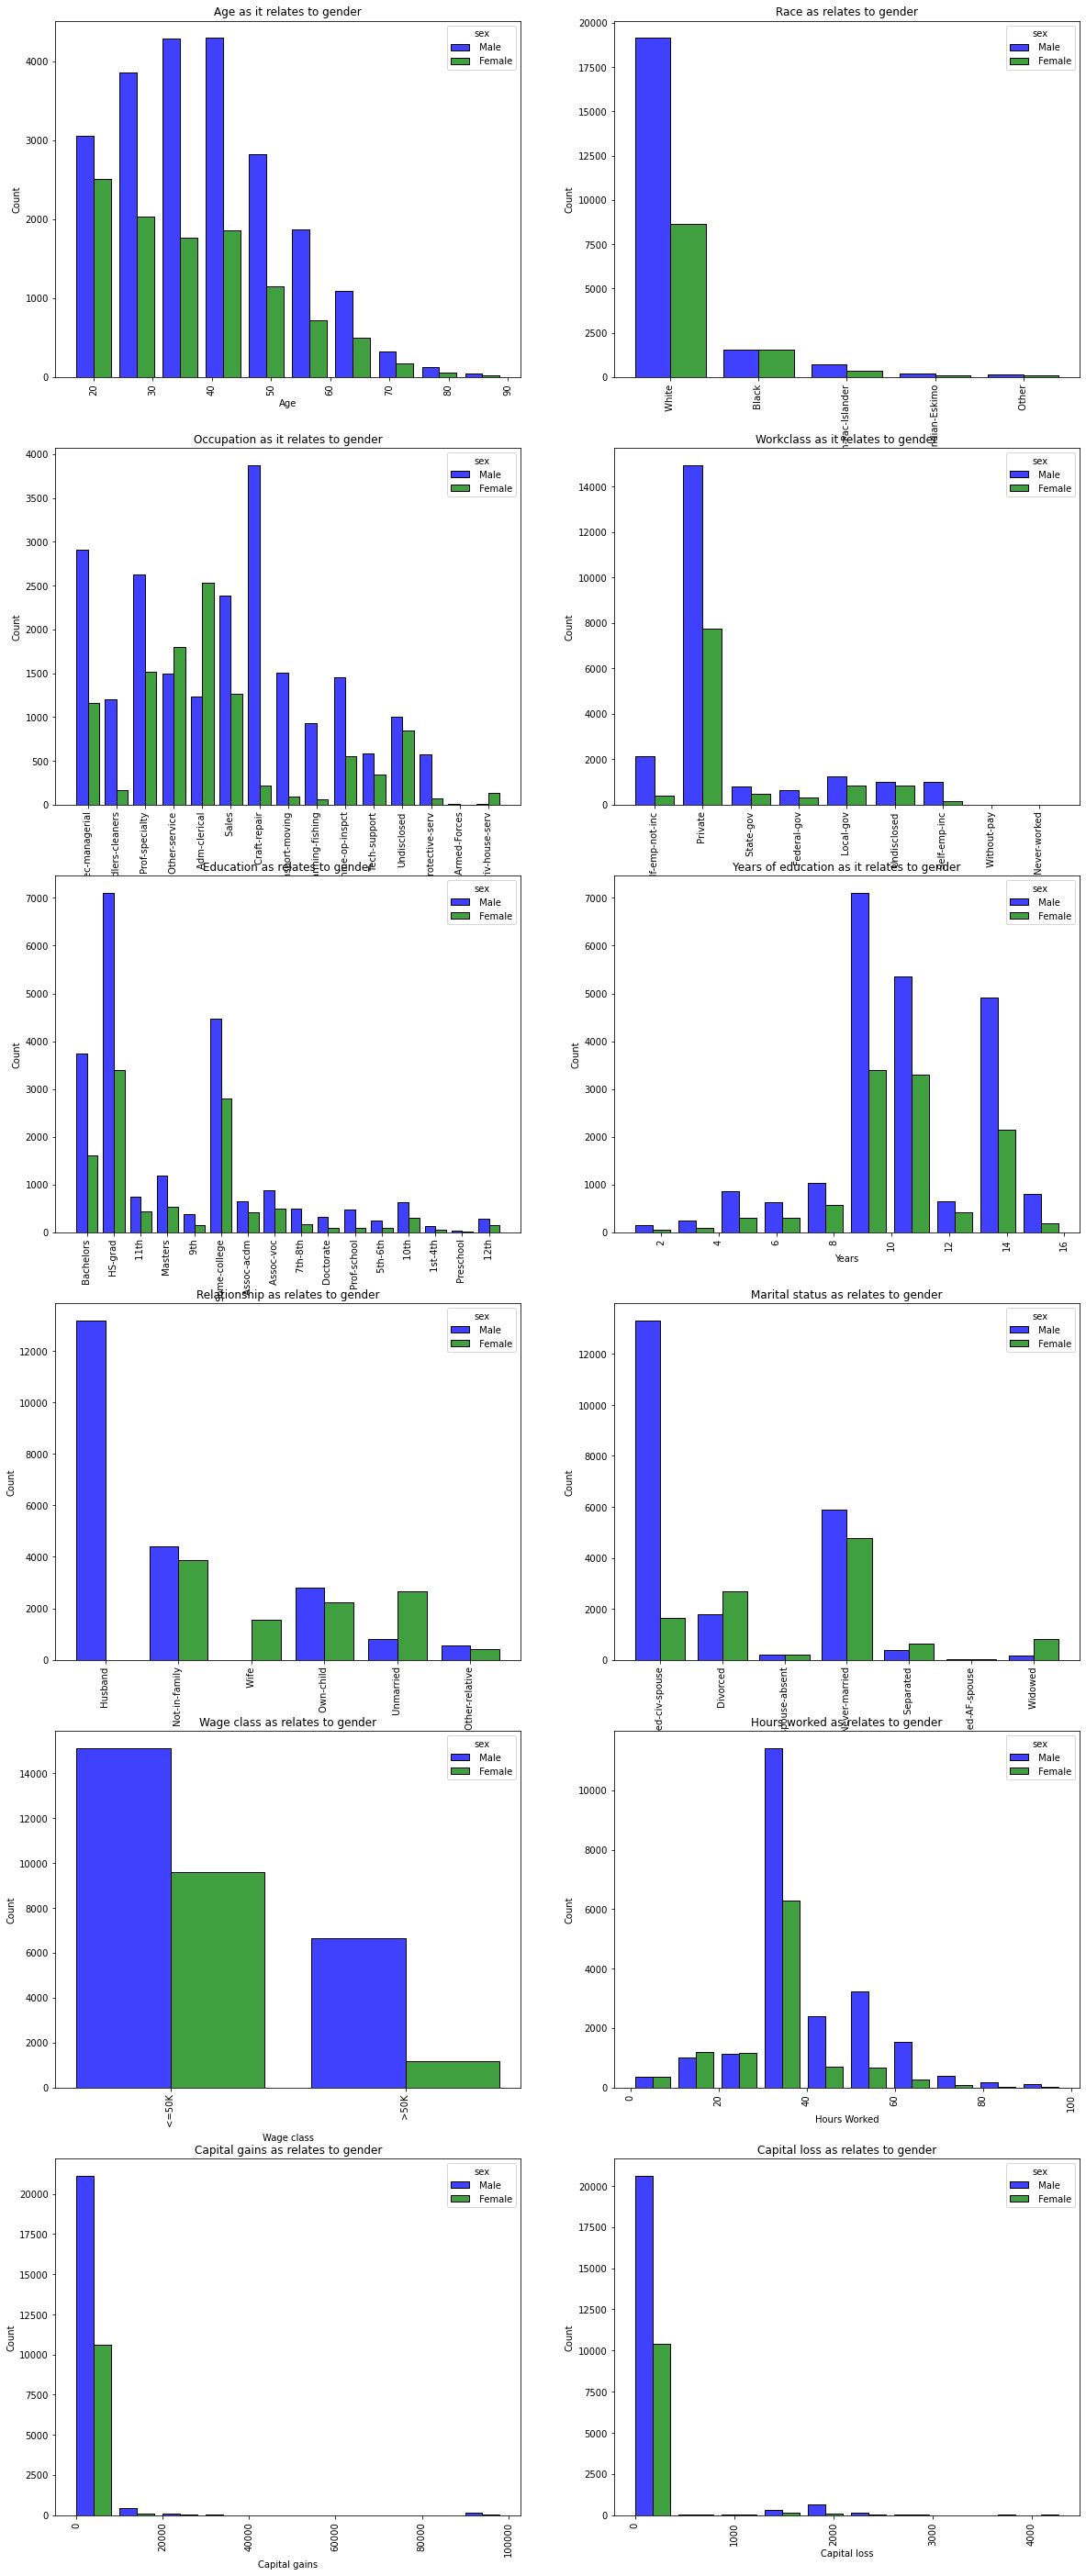

In [ ]:
plt.figure(figsize=(20, 50))
custom_palette = {" Male": "blue", " Female": "green"}
plt.subplot(6, 2, 1)
plot=sns.histplot(data = data, x="age", hue="sex", multiple="dodge", bins = 10, shrink=.8,palette=custom_palette)
plot.set_title('Age as it relates to gender')
plot.set_xlabel('Age')

plt.xticks(rotation=90, ha='center')
#plt.show()

plt.subplot(6, 2, 2)
plot=sns.histplot(data = data, x="race", hue="sex", multiple="dodge", bins = 10, shrink=.8,palette=custom_palette)
plot.set_title('Race as relates to gender')
plot.set_xlabel('Race')

plt.xticks(rotation=90, ha='center')
#plt.show()

plt.subplot(6, 2, 3)
plot=sns.histplot(data = data, x="occupation", hue="sex", multiple="dodge", bins = 10, shrink=.8,palette=custom_palette)
plot.set_title('Occupation as it relates to gender')
plot.set_xlabel('Occupation')

plt.xticks(rotation=90, ha='center')
#plt.show()

plt.subplot(6, 2, 4)
plot=sns.histplot(data = data, x="workclass", hue="sex", multiple="dodge", bins = 10, shrink=.8,palette=custom_palette)
plot.set_title('Workclass as it relates to gender')
plot.set_xlabel('Workclass')

plt.xticks(rotation=90, ha='center')
#plt.show()

plt.subplot(6, 2, 5)
plot=sns.histplot(data = data, x="education", hue="sex", multiple="dodge", bins = 10, shrink=.8,palette=custom_palette)
plot.set_title('Education as relates to gender')
plot.set_xlabel('Level of education')

plt.xticks(rotation=90, ha='center')
#plt.show()

plt.subplot(6, 2, 6)
plot=sns.histplot(data = data, x="education_num", hue="sex", multiple="dodge", bins = 10, shrink=.8,palette=custom_palette)
plot.set_title('Years of education as it relates to gender')
plot.set_xlabel('Years')

plt.xticks(rotation=90, ha='center')
#plt.show()

plt.subplot(6, 2, 7)
plot=sns.histplot(data = data, x="relationship", hue="sex", multiple="dodge", bins = 10, shrink=.8,palette=custom_palette)
plot.set_title('Relationship as relates to gender')
plot.set_xlabel('Relation')

plt.xticks(rotation=90, ha='center')
#plt.show()

plt.subplot(6, 2, 8)
plot=sns.histplot(data = data, x="marital_status", hue="sex", multiple="dodge", bins = 10, shrink=.8,palette=custom_palette)
plot.set_title('Marital status as relates to gender')
plot.set_xlabel('Marital Status')

plt.xticks(rotation=90, ha='center')
#plt.show()

plt.subplot(6, 2, 9)
plot=sns.histplot(data = data, x="wage_class", hue="sex", multiple="dodge", bins = 10, shrink=.8, palette=custom_palette)
plot.set_title('Wage class as relates to gender')
plot.set_xlabel('Wage class')

plt.xticks(rotation=90, ha='center')
#plt.show()

plt.subplot(6, 2, 10)
plot=sns.histplot(data = data, x="hours_per_week", hue="sex", multiple="dodge", bins = 10, shrink=.8,palette=custom_palette)
plot.set_title('Hours worked as relates to gender')
plot.set_xlabel('Hours Worked')

plt.xticks(rotation=90, ha='center')
#plt.show()

plt.subplot(6, 2, 11)
plot=sns.histplot(data = data, x="capital_gains", hue="sex", multiple="dodge", bins = 10, shrink=.8,palette=custom_palette)
plot.set_title('Capital gains as relates to gender')
plot.set_xlabel('Capital gains')

plt.xticks(rotation=90, ha='center')
#plt.show()

plt.subplot(6, 2, 12)
plot=sns.histplot(data = data, x="capital_loss", hue="sex", multiple="dodge", bins = 10, shrink=.8,palette=custom_palette)
plot.set_title('Capital loss as relates to gender')
plot.set_xlabel('Capital loss')

plt.xticks(rotation=90, ha='center')
plt.show()

These `sex` gender based graphs do not show any major differences in preliminary conclusions than what is observed with the target variable being `wage_class`. **We will proceed with using `wage_class` as the dependent variable** as it will be interesting to see how this varies as predictor variables such as `age`, `education`, `gender`, etc... change.

Next, let's calculate the correlation matrix to determine the strength of the relationships between the numerical features of this dataset.

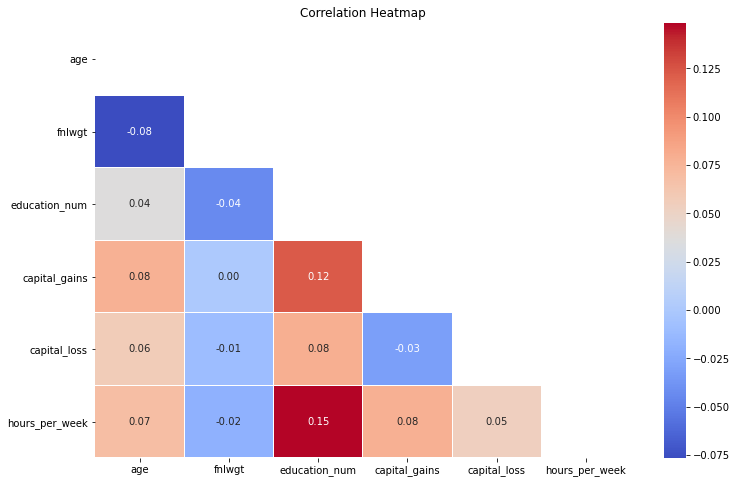

In [ ]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Changing the matrix shape to remove redundant data
matrix = np.triu(data.corr())

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05, mask=matrix)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

Before feature transformations we can see here that there seem to be a positive correlation between the `education_num` variables and `hours_per_week`, `capital_gains`.

### Feature Transformations

Here some variables will be transformed for consistency and for use in ML models.

The `education` variable needs simplification. Here we have re-assigned all education levels at and below 11th grade as `'Dropout'`. `' HS-grad'` and `' 12th` are re-assigned as `'HS_Grad'`, `' Some-college'` and `' Assoc-acdm'` are re-assigned as `'Partial_College'`, `' Assoc-voc'` and `' Prof-school'` are re-assigned as `'Vocational'`, and the remaining education values of `' Bachelors'`, `' Masters'`, and `'Doctorate'` are untouched.

In [ ]:
# Reorganize education feature
data['education'].replace(' Preschool', 'Dropout', inplace=True)
data['education'].replace(' 1st-4th', 'Dropout', inplace=True)
data['education'].replace(' 5th-6th', 'Dropout', inplace=True)
data['education'].replace(' 7th-8th', 'Dropout', inplace=True)
data['education'].replace(' 9th', 'Dropout', inplace=True)
data['education'].replace(' 10th', 'Dropout', inplace=True)
data['education'].replace(' 11th', 'Dropout', inplace=True)

data['education'].replace(' 12th', 'HS_Grad', inplace=True)
data['education'].replace(' HS-grad', 'HS_Grad', inplace=True)

data['education'].replace(' Some-college', 'Partial_College', inplace=True)
data['education'].replace(' Assoc-acdm', 'Partial_College', inplace=True)

data['education'].replace(' Assoc-voc', 'Vocational', inplace=True)
data['education'].replace(' Prof-school', 'Vocational', inplace=True)

In [ ]:
data['education'].value_counts()

HS_Grad            10927
Partial_College     8349
 Bachelors          5352
Dropout             3815
Vocational          1958
 Masters            1722
 Doctorate           413
Name: education, dtype: int64

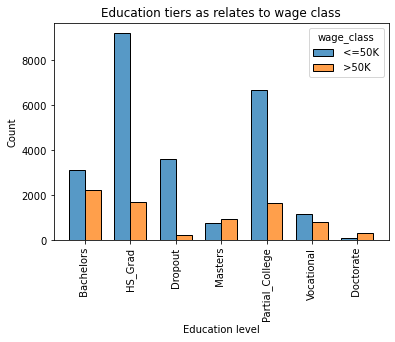

In [ ]:
plot=sns.histplot(data = data, x="education", hue="wage_class", multiple="dodge", bins = 10, shrink=.7)
plot.set_title('Education tiers as relates to wage class')
plot.set_xlabel('Education level')

plt.xticks(rotation=90, ha='center')
plt.show()

After the re-assignments we can gather a more concise image of the wage differences across the education levels. We can see that the majority of people of the lower wage class are high school graduates and the majority of people of the upper wage class graduated with a Bachelors degree. Those with Doctorates have the least number of people in the lower wage class and those who dropped out have the least number of people in the upper wage class.

Next we will look at the `marital_status` variable. The CDC defines married people as "all married people, including those separated from their spouses" [5]. Similarily unmarried people are "single (never married), divorced, or widowed" [5]. We can re-assign the existing values in this variable based on this categorization.

In [ ]:
# According CDC:
# The term “married” encompasses all married people, including those separated from their spouses.
# “Unmarried” includes those who are single (never married), divorced, or widowed.

data['marital_status'].replace(' Married-civ-spouse', 'Married', inplace=True)
data['marital_status'].replace(' Divorced', 'Unmarried', inplace=True)
data['marital_status'].replace(' Married-spouse-absent', 'Married', inplace=True)
data['marital_status'].replace(' Never-married', 'Unmarried', inplace=True)
data['marital_status'].replace(' Separated', 'Married', inplace=True)
data['marital_status'].replace(' Married-AF-spouse', 'Married', inplace=True)
data['marital_status'].replace(' Widowed', 'Unmarried', inplace=True)

In [ ]:
data['marital_status'].value_counts()

Married      16436
Unmarried    16100
Name: marital_status, dtype: int64

Since we have simplified this down to two variables, we can convert this variable to binary.

In [ ]:
data['marital_status'] = np.where(data['marital_status'] == 'Married', 1, 0)

In [ ]:
data['marital_status'].value_counts()

1    16436
0    16100
Name: marital_status, dtype: int64

Similarily, the `'sex'` and `'wage_class'` variables can also be simplified in to binaries.

In [ ]:
data['sex'].value_counts()

 Male      21774
 Female    10762
Name: sex, dtype: int64

In [ ]:
data['sex'] = np.where(data['sex'] == ' Male', 1, 0)

In [ ]:
data['sex'].value_counts()

1    21774
0    10762
Name: sex, dtype: int64

In [ ]:
data['wage_class'] = np.where(data['wage_class'] == ' <=50K', 1, 0)
data['wage_class'].value_counts()

1    24697
0     7839
Name: wage_class, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32536 non-null  int64 
 1   workclass       32536 non-null  object
 2   fnlwgt          32536 non-null  int64 
 3   education       32536 non-null  object
 4   education_num   32536 non-null  int64 
 5   marital_status  32536 non-null  int64 
 6   occupation      32536 non-null  object
 7   relationship    32536 non-null  object
 8   race            32536 non-null  object
 9   sex             32536 non-null  int64 
 10  capital_gains   32536 non-null  int64 
 11  capital_loss    32536 non-null  int64 
 12  hours_per_week  32536 non-null  int64 
 13  native_country  32536 non-null  object
 14  wage_class      32536 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 4.0+ MB


In [ ]:
# Split data into numerical and categorical

numerical_columns = data.select_dtypes(include=['int64'])
categorical_columns = data.select_dtypes(include= ['object'])

print('Numerical Cols: ', numerical_columns.columns)
print('Categorical Cols:', categorical_columns.columns)

Numerical Cols:  Index(['age', 'fnlwgt', 'education_num', 'marital_status', 'sex',
       'capital_gains', 'capital_loss', 'hours_per_week', 'wage_class'],
      dtype='object')
Categorical Cols: Index(['workclass', 'education', 'occupation', 'relationship', 'race',
       'native_country'],
      dtype='object')


Let's rerun the correlation matrix to see the effects of quantifying some of these categorical variables.

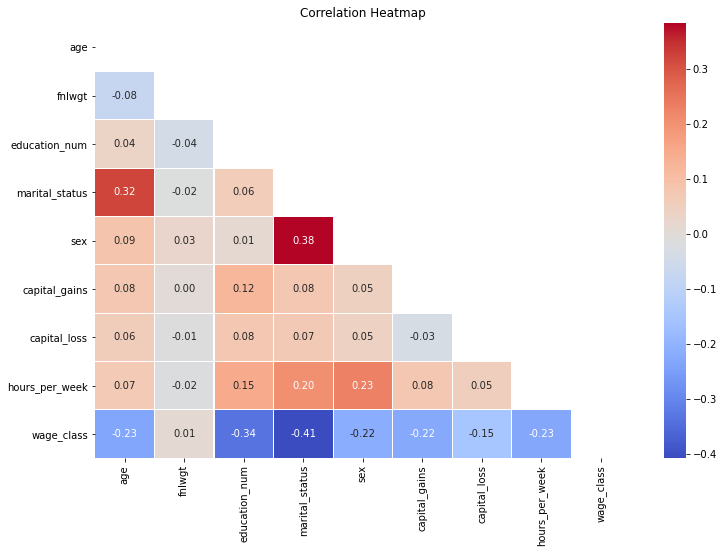

In [ ]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Changing the matrix shape to remove redundant data
matrix = np.triu(data.corr())

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05, mask=matrix)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

We can observe here that the target variable, `'wage_class'` has an overall negative correlation with most other numerical variables.

### Prepare Dataframe to be standardized

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

Let's confirm the dataset information.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32536 non-null  int64 
 1   workclass       32536 non-null  object
 2   fnlwgt          32536 non-null  int64 
 3   education       32536 non-null  object
 4   education_num   32536 non-null  int64 
 5   marital_status  32536 non-null  int64 
 6   occupation      32536 non-null  object
 7   relationship    32536 non-null  object
 8   race            32536 non-null  object
 9   sex             32536 non-null  int64 
 10  capital_gains   32536 non-null  int64 
 11  capital_loss    32536 non-null  int64 
 12  hours_per_week  32536 non-null  int64 
 13  native_country  32536 non-null  object
 14  wage_class      32536 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 4.0+ MB


Next, we will convert the remaining categorical variables in the data into numerical variables. We do this here by giving each category unique integer codes. Once this change is made, the original column is replaced by the encoded column.

In [ ]:
df = data.copy()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column + '_encoded'] = df[column].astype('category').cat.codes
        df.drop(column, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     32536 non-null  int64
 1   fnlwgt                  32536 non-null  int64
 2   education_num           32536 non-null  int64
 3   marital_status          32536 non-null  int64
 4   sex                     32536 non-null  int64
 5   capital_gains           32536 non-null  int64
 6   capital_loss            32536 non-null  int64
 7   hours_per_week          32536 non-null  int64
 8   wage_class              32536 non-null  int64
 9   workclass_encoded       32536 non-null  int8 
 10  education_encoded       32536 non-null  int8 
 11  occupation_encoded      32536 non-null  int8 
 12  relationship_encoded    32536 non-null  int8 
 13  race_encoded            32536 non-null  int8 
 14  native_country_encoded  32536 non-null  int8 
dtypes: int64(9), int8(6

We are dropping the `'fnlwgt'` variable due to lack of clarity of purpose.

In [ ]:
df = df.drop('fnlwgt', axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     32536 non-null  int64
 1   education_num           32536 non-null  int64
 2   marital_status          32536 non-null  int64
 3   sex                     32536 non-null  int64
 4   capital_gains           32536 non-null  int64
 5   capital_loss            32536 non-null  int64
 6   hours_per_week          32536 non-null  int64
 7   wage_class              32536 non-null  int64
 8   workclass_encoded       32536 non-null  int8 
 9   education_encoded       32536 non-null  int8 
 10  occupation_encoded      32536 non-null  int8 
 11  relationship_encoded    32536 non-null  int8 
 12  race_encoded            32536 non-null  int8 
 13  native_country_encoded  32536 non-null  int8 
dtypes: int64(8), int8(6)
memory usage: 2.4 MB


Check for any new null values that may have been created in the encoding process.

In [ ]:
print((df.isnull().sum() / len(df)) * 100)

age                       0.0
education_num             0.0
marital_status            0.0
sex                       0.0
capital_gains             0.0
capital_loss              0.0
hours_per_week            0.0
wage_class                0.0
workclass_encoded         0.0
education_encoded         0.0
occupation_encoded        0.0
relationship_encoded      0.0
race_encoded              0.0
native_country_encoded    0.0
dtype: float64


Now that the data is ready to be preprocessed. We can prepare the data for ML model testing by first doing an 80/20 split to create the training and testing sets. Then we standardize the features.

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop('wage_class', axis=1)
y = df['wage_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Now we are ready to test out different models.

### ML Model Testing

We will try a variety of ML models to determine the best performer for this dataset. We will mainly examine at the accuracy, ROC and area under the curve, and cross validation to decide on the best model.

We'll start with testing out the Random Forest model. One advantages of starting with this model is we can also determine feature importance to determine which features to possibly drop.

#### Random Forest Model

RF Accuracy: 0.8532575291948371
RF ROC AUC Score: 0.8912712434298453
RF F1 Score: 0.9054923305294409
RF Recall: 0.922193106228583
RF Precision: 0.8893856920684292


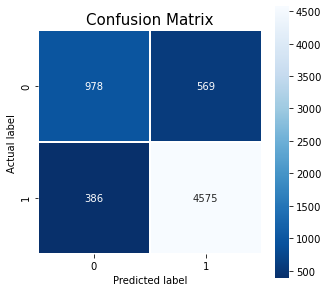

Feature ranking:
1. feature age (0.219591)
2. feature capital_gains (0.123825)
3. feature hours_per_week (0.107970)
4. feature relationship_encoded (0.095200)
5. feature education_num (0.087300)
6. feature occupation_encoded (0.086940)
7. feature marital_status (0.083307)
8. feature workclass_encoded (0.051741)
9. feature education_encoded (0.051422)
10. feature capital_loss (0.039603)
11. feature native_country_encoded (0.023007)
12. feature race_encoded (0.017390)
13. feature sex (0.012704)


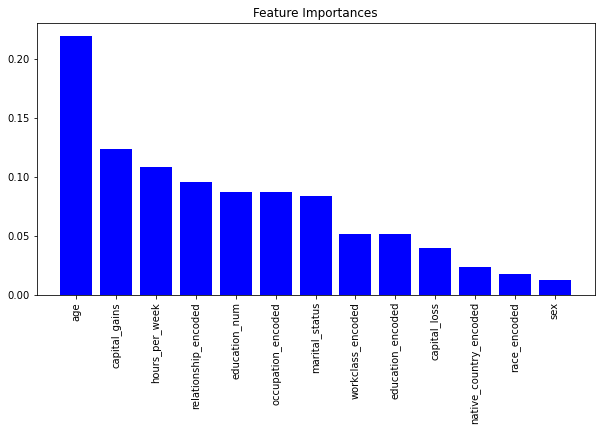

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Testing the model
accuracy_rf = accuracy_score(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba)
f1_rf = f1_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)

print("RF Accuracy:", accuracy_rf)
print("RF ROC AUC Score:", roc_auc_rf)
print("RF F1 Score:", f1_rf)
print("RF Recall:", recall_rf)
print("RF Precision:", precision_rf)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

#  feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # indices of features sorted by importance

# feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plotting the feature importances
plt.figure(figsize=(10, 5))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

According to the feature ranking we can see that the last three features that are considered least important are `'native_country'`, `'race'`, and `'sex'`. When we run the final model we can drop these three features.

#### Logisitic Regression

LogReg Accuracy: 0.8409649661954518
LogReg ROC AUC Score: 0.8931080657962096
LogReg F1 Score: 0.8994462255902068
LogReg Recall: 0.9330780084660351
LogReg Precision: 0.8681545386346586


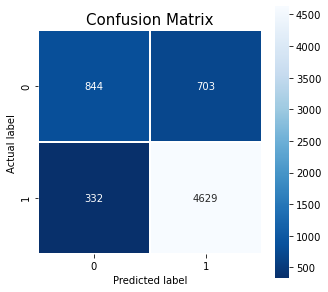

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Testing the model
accuracy_logreg = accuracy_score(y_test, y_pred)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba)
f1_logreg = f1_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
precision_logreg = precision_score(y_test, y_pred)

print("LogReg Accuracy:", accuracy_logreg)
print("LogReg ROC AUC Score:", roc_auc_logreg)
print("LogReg F1 Score:", f1_logreg)
print("LogReg Recall:", recall_logreg)
print("LogReg Precision:", precision_logreg)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

#### KNN

KNN Accuracy: 0.8312845728334358
KNN ROC AUC Score: 0.8473168933583698
KNN F1 Score: 0.8914376112319556
KNN Recall: 0.908687764563596
KNN Precision: 0.8748301960023287


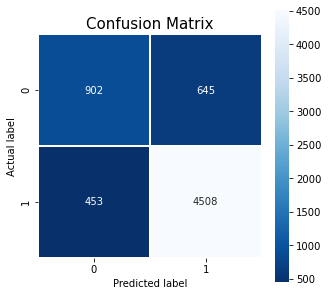

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Testing the model
accuracy_knn = accuracy_score(y_test, y_pred)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba)
f1_knn = f1_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)

print("KNN Accuracy:", accuracy_knn)
print("KNN ROC AUC Score:", roc_auc_knn)
print("KNN F1 Score:", f1_knn)
print("KNN Recall:", recall_knn)
print("KNN Precision:", precision_knn)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

#### Gaussian Naive Bayes

GNB Accuracy: 0.8206822372464659
GNB ROC AUC Score: 0.8674308605181176
GNB F1 Score: 0.8891422057566257
GNB Recall: 0.9433581939125176
GNB Precision: 0.8408192597915918


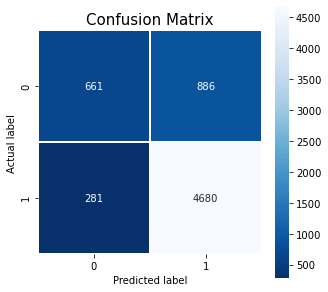

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Testing the model
accuracy_gnb = accuracy_score(y_test, y_pred)
roc_auc_gnb = roc_auc_score(y_test, y_pred_proba)
f1_gnb = f1_score(y_test, y_pred)
recall_gnb = recall_score(y_test, y_pred)
precision_gnb = precision_score(y_test, y_pred)

print("GNB Accuracy:", accuracy_gnb)
print("GNB ROC AUC Score:", roc_auc_gnb)
print("GNB F1 Score:", f1_gnb)
print("GNB Recall:", recall_gnb)
print("GNB Precision:", precision_gnb)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

#### XGBooster

XGB Accuracy: 0.8733866011063307
XGB ROC AUC Score: 0.9276354921979026
XGB F1 Score: 0.9186413902053712
XGB Recall: 0.9377141705301351
XGB Precision: 0.9003290110315464


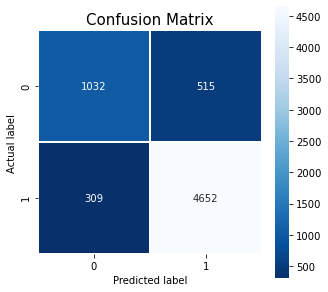

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Testing the model
accuracy_xgb = accuracy_score(y_test, y_pred)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba)
f1_xgb = f1_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)

print("XGB Accuracy:", accuracy_xgb)
print("XGB ROC AUC Score:", roc_auc_xgb)
print("XGB F1 Score:", f1_xgb)
print("XGB Recall:", recall_xgb)
print("XGB Precision:", precision_xgb)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

In [ ]:
accuracies=pd.DataFrame({'Model':['Random Forest','Logistic Reg','KNN','GaussianNB', 'XGBooster'],
                    'Accuracy':[accuracy_rf,accuracy_logreg,accuracy_knn,accuracy_gnb, accuracy_xgb]})
print(accuracies)

           Model  Accuracy
0  Random Forest  0.853258
1   Logistic Reg  0.840965
2            KNN  0.831285
3     GaussianNB  0.820682
4      XGBooster  0.873387


In [ ]:
auc=pd.DataFrame({'Model':['Random Forest','Logistic Reg','KNN','GaussianNB','XGBooster'],
                    'AUC':[roc_auc_rf,roc_auc_logreg,roc_auc_knn,roc_auc_gnb, roc_auc_xgb]})
print(auc)

           Model       AUC
0  Random Forest  0.891271
1   Logistic Reg  0.893108
2            KNN  0.847317
3     GaussianNB  0.867431
4      XGBooster  0.927635


#### Cross Validation (5 folds)

Next we will perform cross validation of the different models to determine the stability of the models' predictions. Since we have a relatively small dataset here, we will start with a `cv` equal to 5, indicating that a the data is split into 5 folds.

In [ ]:
rand_for=RandomForestClassifier()
score_rand_for=cross_val_score(rand_for, X, y, cv=5, n_jobs=-1)

print(score_rand_for.mean())

0.8481375265198304


In [ ]:
logReg=LogisticRegression()
score_logReg=cross_val_score(logReg, X, y, cv=5, n_jobs=-1)

print(score_logReg.mean())

0.8158350437035846


In [ ]:
knn=KNeighborsClassifier()
score_knn=cross_val_score(knn, X, y, cv=5, n_jobs=-1)

print(score_knn.mean())

0.8363966836716623


In [ ]:
gnb = GaussianNB()
score_lin=cross_val_score(gnb, X, y, cv=5, n_jobs=-1)

print(score_lin.mean())

0.8112860586334664


In [ ]:
xgb = XGBClassifier()
score_xgb=cross_val_score(xgb, X, y, cv=5, n_jobs=-1)

print(score_xgb.mean())

0.872295440142992


In [ ]:
cv_scores_5=pd.DataFrame({'Model':['Random Forest','Logistic Reg','KNN','GaussianNB', 'XGBooster'],
                    'CV Score cv5':[score_rand_for.mean(),score_logReg.mean(),score_knn.mean(),score_lin.mean(), score_xgb.mean()]})

print(cv_scores_5)

           Model  CV Score cv5
0  Random Forest      0.848138
1   Logistic Reg      0.815835
2            KNN      0.836397
3     GaussianNB      0.811286
4      XGBooster      0.872295


#### Cross Validation (7 folds)

Now let's change the `cv` attribute to 7 folds to see if this has an effect on the estimate of model performance. Here we're not increasing the number of folds to 10 since we are not working with a fairly large dataset and this can lead to increased variance in performance estimate and an increase time for processing.

In [ ]:
from xgboost import XGBClassifier

rand_for=RandomForestClassifier()
score_rand_for_7=cross_val_score(rand_for, X, y, cv=7, n_jobs=-1)

logReg=LogisticRegression()
score_logReg_7=cross_val_score(logReg, X, y, cv=7, n_jobs=-1)

knn=KNeighborsClassifier()
score_knn_7=cross_val_score(knn, X, y, cv=7, n_jobs=-1)

gnb = GaussianNB()
score_lin_7=cross_val_score(gnb, X, y, cv=7, n_jobs=-1)


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

xgb_classifier = XGBClassifier()

score_xgb_7 = cross_val_score(xgb_classifier, X, y, cv=7, n_jobs=-1)


In [ ]:
model_eval = pd.DataFrame({'Model':['Random Forest', 'Logistic Reg', 'KNN', 'GaussianNB',  'XGBoost'],
                           'Accuracy':[accuracy_rf, accuracy_logreg, accuracy_knn, accuracy_gnb, accuracy_xgb],
                           'AUC':[roc_auc_rf, roc_auc_logreg, roc_auc_knn, roc_auc_gnb, roc_auc_xgb],
                           'CV Score cv5':[score_rand_for.mean(), score_logReg.mean(), score_knn.mean(), score_lin.mean(), score_xgb.mean()],
                           'CV Score cv7':[score_rand_for_7.mean(), score_logReg_7.mean(), score_knn_7.mean(), score_lin_7.mean(), score_xgb_7.mean()]
                          })

print(model_eval)

           Model  Accuracy       AUC  CV Score cv5  CV Score cv7
0  Random Forest  0.853258  0.891271      0.848138      0.848875
1   Logistic Reg  0.840965  0.893108      0.815835      0.815374
2            KNN  0.831285  0.847317      0.836397      0.837810
3     GaussianNB  0.820682  0.867431      0.811286      0.811409
4        XGBoost  0.873387  0.927635      0.872295      0.871957


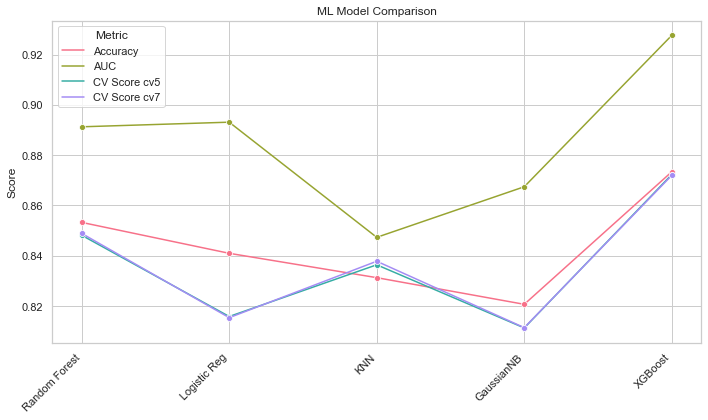

In [ ]:
# Melt the DataFrame for easier plotting
melted_df = model_eval.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.set(style="whitegrid", context="notebook")

# Create the line chart
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", 4)  # Choose a color palette
sns.lineplot(x='Model', y='Score', hue='Metric', data=melted_df, marker='o', palette=palette)
plt.xticks(rotation=45, ha='right')
plt.title('ML Model Comparison')
plt.xlabel('')
plt.ylabel('Score')
plt.tight_layout()

plt.show()

## Conclusion and Recommendation

In this case study we took income information from the 1994 US census to observe the effects demographics have on the effects of wages earned. The dataset was previewed, cleaned, transformed, and standardized. Five machine learning models were run to determine the optimal model performance.  

We compared accuracy, AUC, and cross-validation scores of these model. We look to the accuracy of the model to determine the total number of predictions that the model correctly predicted. Next, the area under the curve (AUC) of the ROC curve determines how well the model can predict true positives and false positives. As previously mentioned, cross-validation is a good measure of the stability of the models.

From the previous graph we can see that the best performing model is XGBoost, it has the highest values for all metrics. The next best model would be the Random Forest model. Based on these final metrics the XGBoost Classifier model would be the best performing.

The dataset [repository](https://archive.ics.uci.edu/dataset/2/adult) from UCI ML Repository also confirms that the model with the highest accuracy is XGBoost followed by Random Forest [6].

## Citations
[1] Bureau, U. C. (2023). Why We Ask Questions About... Income. Retrieved from https://www.census.gov/acs/www/about/why-we-ask-each-question/income/#:~:text=Income%20data%20measure%20the%20economic,%2C%20housing%2C%20and%20other%20assistance.

[2] Bureau, U. C. (1996, April 1). Income, Poverty, and Valuation of Noncash Benefits: 1994. Census.gov. https://www.census.gov/library/publications/1996/demo/p60-189.html#:~:text=The%20median%20income%20of%20households

[3] Wolla, S. A., & Sullivan, J. (2017, January). Education, Income, and Wealth. Research.stlouisfed.org. https://research.stlouisfed.org/publications/page1-econ/2017/01/03/education-income-and-wealth#:~:text=The%20relationship%20between%20education%20and

[4] capital gains. (n.d.). LII / Legal Information Institute. https://www.law.cornell.edu/wex/capital_gains

[5] Marital status - Health, United States. (2022, August 8). Www.cdc.gov. https://www.cdc.gov/nchs/hus/sources-definitions/marital-status.htm#:~:text=Classified%20through%20self%2Dreporting%20in

[6] UCI Machine Learning Repository. (n.d.). Archive.ics.uci.edu. https://archive.ics.uci.edu/dataset/2/adult